# **Удовлетворенность пассажиров авиакомпаний**

Какие факторы влияют на удовлетворенность клиентов авиакомпании?

## **Информация о наборе данных**

### **Контекст**

Данный набор данных содержит опрос об удовлетворенности пассажиров авиакомпании. Какие факторы имеют высокую корреляцию с удовлетворенностью (или неудовлетворенностью) пассажира? Можно ли предсказать степень удовлетворенности пассажиров?


### **Содержание**

*Пол*: Пол пассажира (женский, мужской)

*Тип клиента*: Тип клиента (Лояльный клиент, нелояльный клиент)

*Возраст*: Фактический возраст пассажиров

*Тип поездки*: Цель полета пассажиров (Личная поездка, Деловая поездка)

*Класс*: Класс полета в самолете пассажиров (Бизнес, Эко, Эко Плюс)

*Расстояние полета*: Расстояние полета в данном путешествии.

*Услуга Wi-Fi* в самолете: Уровень удовлетворенности услугой Wi-Fi в самолете (0:Не применимо;1-5)

*Удобное время вылета/прилета*: Уровень удовлетворенности удобством времени вылета/прилета

*Удобство онлайн-бронирования*: Уровень удовлетворенности онлайн-бронированием

*Расположение ворот*: Уровень удовлетворенности расположением ворот

*Питание и напитки*: Уровень удовлетворенности едой и напитками

*Онлайн посадка*: Уровень удовлетворенности онлайн-посадкой

*Комфорт сидений*: Уровень удовлетворенности комфортом сидений

*Развлечения в полете*: Уровень удовлетворенности развлечениями в полете

*Бортовое обслуживание*: Уровень удовлетворенности обслуживанием на борту

*Обслуживание в зале ожидания*: Уровень удовлетворенности обслуживанием в зале ожидания

*Обработка багажа*: Уровень удовлетворенности обслуживанием багажа

*Обслуживание при регистрации*: Уровень удовлетворенности обслуживанием при регистрации

*Обслуживание во время полета*: Уровень удовлетворенности обслуживанием в полете

*Чистота*: Уровень удовлетворенности чистотой

*Задержка вылета в минутах*: Минуты задержки при вылете

*Задержка прибытия в минутах*: Минуты задержки при прибытии

*Удовлетворенность*: Уровень удовлетворенности авиакомпанией (удовлетворенность, нейтральность или неудовлетворенность)

## **Работа с набором данных**

### Подключение необходимых библиотек

In [151]:
import numpy as np                 # Одномерные и многомерные массивы
import pandas as pd                # Таблицы и временные ряды
import matplotlib.pyplot as plt    # Научная графика
import seaborn as sns              # Еще больше графики для визуализации данных

%matplotlib inline


### Загрузка набора данных

In [152]:
dataset_url = "https://raw.githubusercontent.com/anna-chernova/ml_homework/master/data/airline-passenger-satisfaction.csv"
dataset = pd.read_csv(dataset_url)

### Визуализация и вычисление основных характеристик набора данных

In [121]:
dataset.shape

(103904, 25)

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [123]:
dataset.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [124]:
dataset.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

Значение строк:
1. count - количество значений для каждого признака;
2. mean - среднее значение;
3. std - стандартное отклонение;
4. min - минимальное значение;
5. 25% - первый квартиль;
6. 50% - медиана;
7. 75% - третий квартиль;
8. max - максимальное значение.

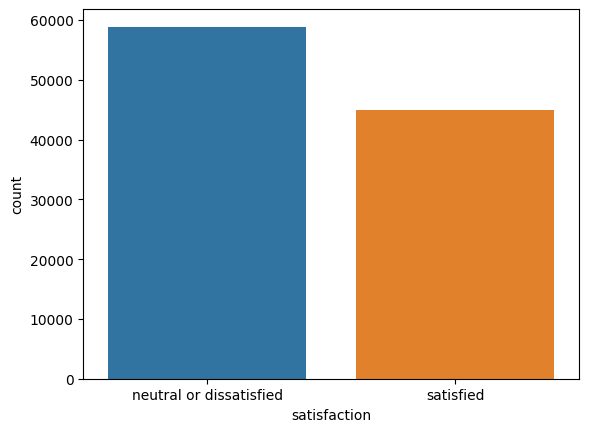

In [125]:
sns.countplot(x='satisfaction', data=dataset)
pass

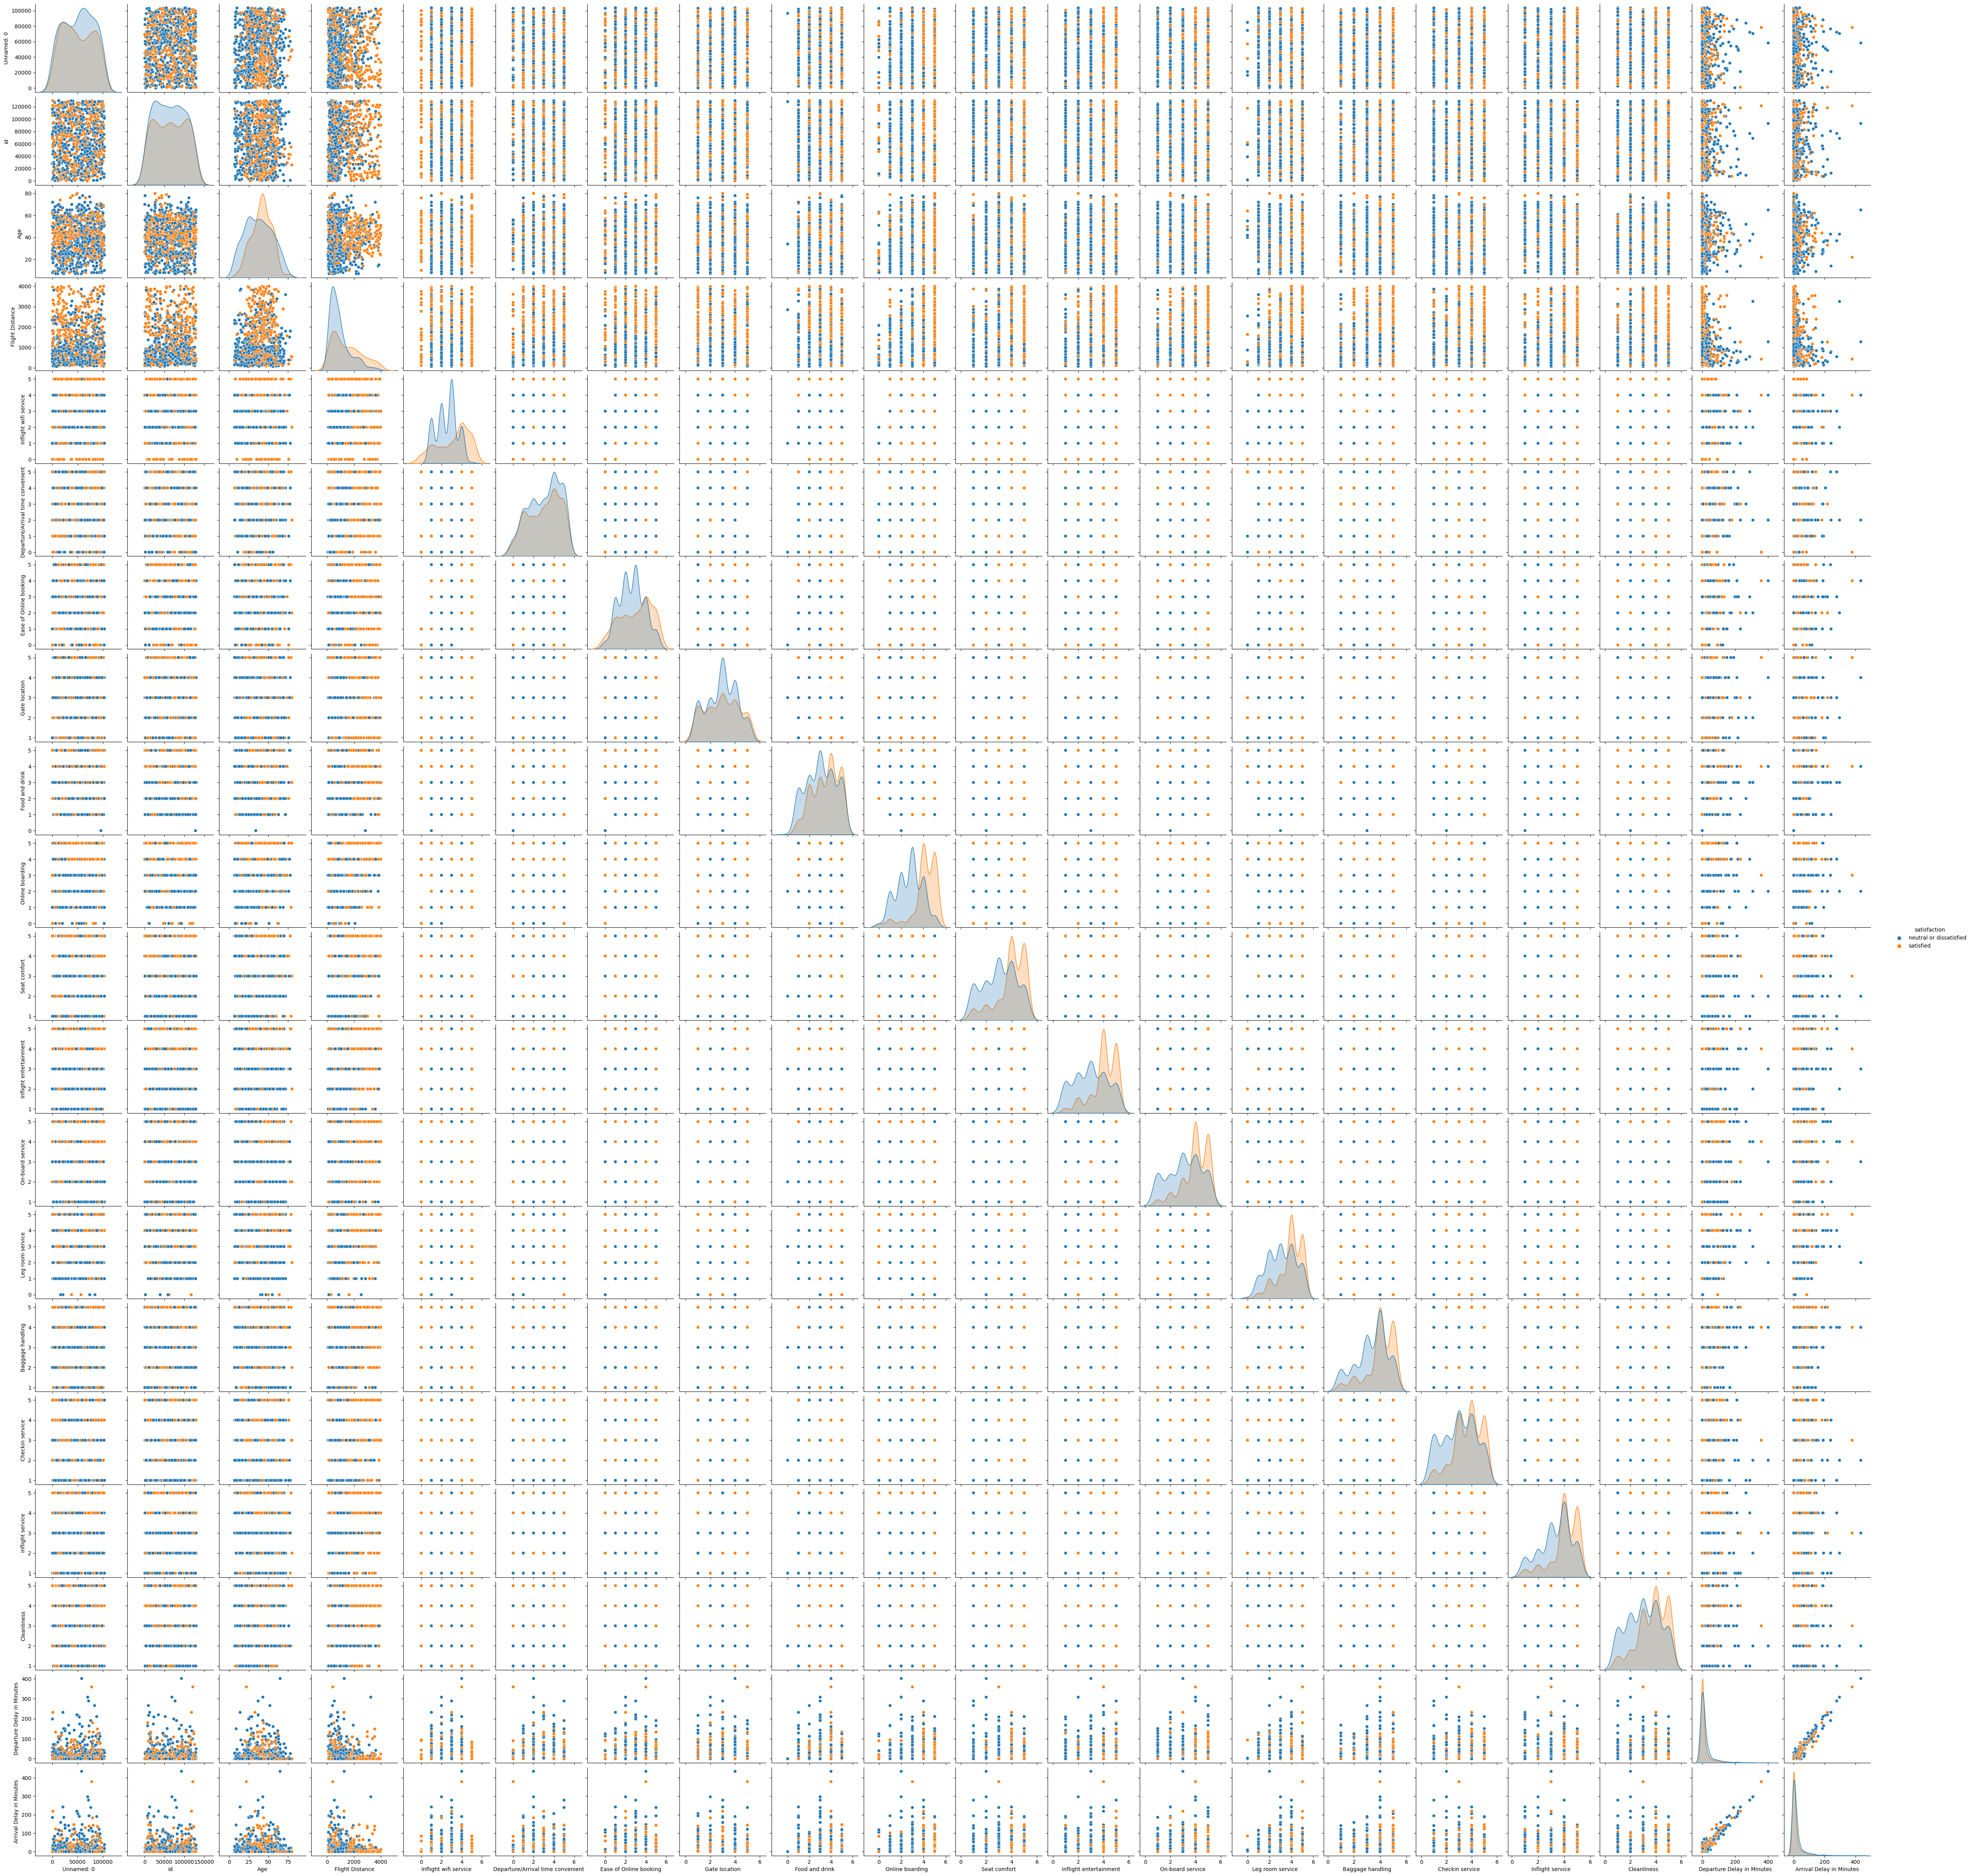

In [126]:
sns.pairplot(dataset.sample(1000), hue='satisfaction')
pass

In [127]:
corr_matrix = dataset.corr()
corr_matrix

<ipython-input-127-4a9f2ce401ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


Unnamed: 0        id       Age  \
Unnamed: 0                           1.000000  0.002991  0.004786   
id                                   0.002991  1.000000  0.022857   
Age                                  0.004786  0.022857  1.000000   
Flight Distance                      0.002794  0.095544  0.099461   
Inflight wifi service               -0.002490 -0.021276  0.017859   
Departure/Arrival time convenient    0.000739 -0.002110  0.038125   
Ease of Online booking               0.001913  0.014163  0.024842   
Gate location                        0.005073 -0.000606 -0.001330   
Food and drink                      -0.002162  0.001063  0.023000   
Online boarding                      0.001002  0.055477  0.208939   
Seat comfort                         0.000044  0.052903  0.160277   
Inflight entertainment               0.001363  0.002300  0.076444   
On-board service                     0.000813  0.055241  0.057594   
Leg room service                     0.004052  0.044634  0.040583   
Baggage handling                    -0.000526  0.074940 -0.047529   
Checkin service                     -0.004321  0.079273  0.035482   
Inflight service                    -0.000134  0.079346 -0.049427   
Cleanliness                         -0.001117  0.024965  0.053611   
Departure Delay in Minutes          -0.000045 -0.019546 -0.010152   
Arrival Delay in Minutes            -0.000045 -0.037254 -0.012147   

                                   Flight Distance  Inflight wifi service  \
Unnamed: 0                                0.002794              -0.002490   
id                                        0.095544              -0.021276   
Age                                       0.099461               0.017859   
Flight Distance                           1.000000               0.007131   
Inflight wifi service                     0.007131               1.000000   
Departure/Arrival time convenient        -0.020043               0.343845   
Ease of Online booking                    0.065717               0.715856   
Gate location                             0.004793               0.336248   
Food and drink                            0.056994               0.134718   
Online boarding                           0.214869               0.456970   
Seat comfort                              0.157333               0.122658   
Inflight entertainment                    0.128740               0.209321   
On-board service                          0.109526               0.121500   
Leg room service                          0.133916               0.160473   
Baggage handling                          0.063184               0.120923   
Checkin service                           0.073072               0.043193   
Inflight service                          0.057540               0.110441   
Cleanliness                               0.093149               0.132698   
Departure Delay in Minutes                0.002158              -0.017402   
Arrival Delay in Minutes                 -0.002426              -0.019095   

                                   Departure/Arrival time convenient  \
Unnamed: 0                                                  0.000739   
id                                                         -0.002110   
Age                                                         0.038125   
Flight Distance                                            -0.020043   
Inflight wifi service                                       0.343845   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.436961   
Gate location                                               0.444757   
Food and drink                                              0.004906   
Online boarding                                             0.070119   
Seat comfort                                                0.011344   
Inflight entertainment                                     -0.004861   
On-board service               

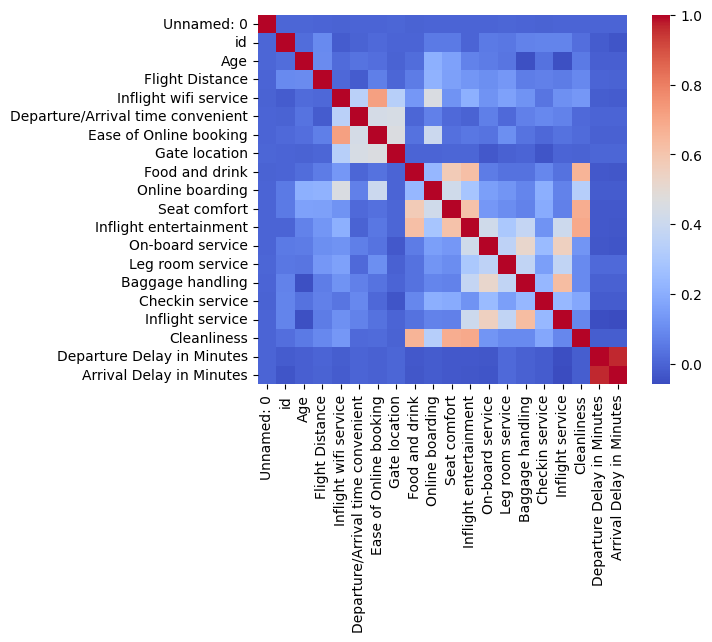

In [128]:
sns.heatmap(corr_matrix, square=True, cmap="coolwarm")
pass

In [129]:
corr_matrix.where(np.triu(np.abs(corr_matrix) > 0.5, k=1)).stack().sort_values(ascending=False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
Inflight wifi service       Ease of Online booking      0.715856
Inflight entertainment      Cleanliness                 0.691815
Seat comfort                Cleanliness                 0.678534
Food and drink              Cleanliness                 0.657760
Baggage handling            Inflight service            0.628561
Food and drink              Inflight entertainment      0.622512
Seat comfort                Inflight entertainment      0.610590
Food and drink              Seat comfort                0.574556
On-board service            Inflight service            0.550782
                            Baggage handling            0.519134
dtype: float64

### Обработка пропущенных значений

В моем наборе данных имеются пропущенные значения - это 310 значений признака "Задержка прибытия в минутах". Я удалила строки с пропущенными значениями, поскольку они составляют незначительную часть набора данных.

В целом, более предпочтительным подходом является замена пропущенных значений для числовых признаков медианными значениями, а для категориальных признаков - модами.

In [153]:
dataset.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [154]:
dataset = dataset.dropna()

### Категориальные признаки

In [155]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1

def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1

def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1

def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0
    else:
        return -1

def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

def process_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis = 1)
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)

    return df

dataset = process_data(dataset)

### Нормализация набора данных

Необходимость нормализации возникает из-за того, что разные признаки в обучающем наборе данных могут иметь разные масштабы и изменяться в различных диапазонах. Это может нарушать баланс между влиянием входных переменных, представленных в разных масштабах, на выходную переменную. Фактически это влияние связано не с реальной зависимостью, а с изменением масштаба. В результате, обучаемая модель может выявить некорректные зависимости.

В моем случае, вопрос о нормализации остается спорным, поскольку 14 из 18 числовых признаков уже нормализованы от 0 до 5. Тем не менее, в этом есть смысл из-за больших значений "Расстояние полета", "Задержка отправления в минутах", "Задержка прибытия в минутах".

Изменим признак "Удовлетворенность" так, чтобы он был пригоден для задачи классификации. Для этого заменим текущие строковые значения на числовые, "neutral or dissatisfied" заменим на 0, а "satisfied" на 1. И изменим тип колонки "Удовлетворенность" на "int64".

In [156]:
dataset = dataset.replace({'neutral or dissatisfied': 0, 'satisfied': 1})
dataset['satisfaction'] = dataset['satisfaction'].astype('int64')

Для наглядности визуализации были введены категориальные признаки. Теперь от них нужно избавиться. Введём бинарные признаки для каждой категории.

In [157]:
dataset = pd.get_dummies(dataset)

Чтобы нормализовать числовые признаки нужно выполнить линейное преобразование диапазона каждого из числовых значений к отрезку [0;1].

In [158]:
dataset = (dataset - dataset.min(axis=0)) / (dataset.max(axis=0) - dataset.min(axis=0))

### Разбиение данных на обучающую и тестовую выборки

Импорт необходимых модулей

In [159]:
from sklearn.model_selection import train_test_split

В качестве размера обучающей выборки выберем 20000 строк, а в качестве тестовой 5000.

In [160]:
from sklearn.preprocessing import StandardScaler

features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

x = dataset[features]
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 20000, test_size = 5000,
                                                    stratify = y, random_state = 4090)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### Kлассификатор k ближайших соседей

Выбор значения k (количество соседних точек, используемых для прогнозирования целевой точки) напрямую влияет на результат прогнозирования.
С уменьшением значения k модель становится более зависимой от ближайших соседних выборок и будет иметь лучшую чувствительность, но стабильность будет слабее, что может привести к переобучению.
Наоборот, увеличение значения k улучшает стабильность модели, но уменьшается ее чувствительность, что может привести к недостаточной подгонке.


Импорт необходимых модулей

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

3 соседа

In [162]:
knc_model = KNeighborsClassifier(n_neighbors=3)
knc_model.fit(X_train, y_train)

y_train_pred = knc_model.predict(X_train)
y_test_pred = knc_model.predict(X_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 95.19%, тестовая 91.30%
Среднеквадратическая ошибка. Обучающая 4.81%, тестовая 8.70%


5 соседей (по умолчанию)

In [163]:
knc_model = KNeighborsClassifier()
knc_model.fit(X_train, y_train)

y_train_pred = knc_model.predict(X_train)
y_test_pred = knc_model.predict(X_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 94.19%, тестовая 91.78%
Среднеквадратическая ошибка. Обучающая 5.81%, тестовая 8.22%


7 соседей

In [164]:
knc_model = KNeighborsClassifier(n_neighbors=7)
knc_model.fit(X_train, y_train)

y_train_pred = knc_model.predict(X_train)
y_test_pred = knc_model.predict(X_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 93.53%, тестовая 91.74%
Среднеквадратическая ошибка. Обучающая 6.47%, тестовая 8.26%


9 соседей

In [165]:
knc_model = KNeighborsClassifier(n_neighbors=9)
knc_model.fit(X_train, y_train)

y_train_pred = knc_model.predict(X_train)
y_test_pred = knc_model.predict(X_test)

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Оценка точности. Обучающая 93.14%, тестовая 91.72%
Среднеквадратическая ошибка. Обучающая 6.86%, тестовая 8.28%


**Вывод**
При увеличении гиперпараметра k (соседнее число) точность на обучающей выборке снижается в среднем на 0.75%, в то время как точность на тестовой выборке остается примерно на уровне 91.5%.

### Дерево решений

Импорт необходимых модулей

In [166]:
from sklearn.tree import DecisionTreeClassifier

По умолчанию

In [167]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

y_train_pred = dtc_model.predict(X_train)
y_test_pred = dtc_model.predict(X_test)

print ('Глубина:', dtc_model.get_depth())
print ('Листья:', dtc_model.get_n_leaves())

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Глубина: 29
Листья: 949
Оценка точности. Обучающая 100.00%, тестовая 93.04%
Среднеквадратическая ошибка. Обучающая 0.00%, тестовая 6.96%


Глубина 9

In [168]:
dtc_model = DecisionTreeClassifier(max_depth=9)
dtc_model.fit(X_train,y_train)

y_train_pred = dtc_model.predict(X_train)
y_test_pred = dtc_model.predict(X_test)

print ('Глубина:', dtc_model.get_depth())
print ('Листья:', dtc_model.get_n_leaves())

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Глубина: 9
Листья: 181
Оценка точности. Обучающая 95.05%, тестовая 93.00%
Среднеквадратическая ошибка. Обучающая 4.95%, тестовая 7.00%


Глубина 12

In [169]:
dtc_model = DecisionTreeClassifier(max_depth=12)
dtc_model.fit(X_train,y_train)

y_train_pred = dtc_model.predict(X_train)
y_test_pred = dtc_model.predict(X_test)

print ('Глубина:', dtc_model.get_depth())
print ('Листья:', dtc_model.get_n_leaves())

print("Оценка точности. Обучающая {:.2f}%, тестовая {:.2f}%".format(accuracy_score(y_train, y_train_pred) * 100, accuracy_score(y_test, y_test_pred) * 100))
print("Среднеквадратическая ошибка. Обучающая {:.2f}%, тестовая {:.2f}%".format(mean_squared_error(y_train, y_train_pred) * 100, mean_squared_error(y_test, y_test_pred) * 100))

Глубина: 12
Листья: 427
Оценка точности. Обучающая 97.36%, тестовая 93.92%
Среднеквадратическая ошибка. Обучающая 2.65%, тестовая 6.08%


При оптимальных параметрах каждого из методов, алгоритм дерева решений оказался более точным, чем алгоритм к-ближайших соседей как на обучающей, так и на тестовой выборке, хотя это различие было несущественным.

### Случайный лес

Импорт необходимых модулей

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [171]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Оценка точности. Обучающая {train_accuracy:.2f}%, тестовая {test_accuracy:.2f}%")
print(f"Среднеквадратическая ошибка. Обучающая {train_mse:.2f}%, тестовая {test_mse:.2f}%")

Оценка точности. Обучающая 100.00%, тестовая 95.24%
Среднеквадратическая ошибка. Обучающая 0.00%, тестовая 0.05%


### Общие выводы

В работе производился анализ данных о удовлетворенности пассажиров авиакомпании и решение задачи классификации с помощью моделей, которые были натренированы методами k-ближайших соседей, дерева решений, случайного леса. В ходе работы проведены:

1. Вычисление основных статистических характеристик
2. Визуализация данных
3. Обработка пропущенных значений
4. Обработка категориальных признаков
4. Нормализация числовых признаков
5. Разбиение данных на обучающую и тестовую выборки
6. Использование различных моделей для задачи классифифкации